# DESARROLLO LABORATORIO 07 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss         #Para llevar a cabo UnderSampling
from imblearn.over_sampling import RandomOverSampler #Para llevar a cabo OverSampling
from imblearn.combine import SMOTETomek              #Para combinar U/O Sampling


In [2]:
os.chdir("D:\Social Data Consulting\Python for Data Science\data")

In [3]:
fileCsv="creditcard.csv"
df_fraude=pd.read_csv(fileCsv,sep=',')

In [4]:
# Conociendo la data

In [5]:
df_fraude.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [6]:
fraude_freq=pd.value_counts(df_fraude.Class)
fraude_freq

'0'    284315
'1'       492
Name: Class, dtype: int64

In [7]:
fraude_freq*100/sum(fraude_freq)

'0'    99.827251
'1'     0.172749
Name: Class, dtype: float64

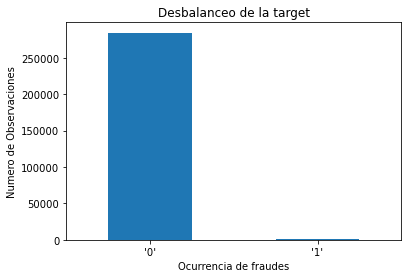

In [8]:
fraude_freq.plot(kind='bar',rot=0)
plt.title('Desbalanceo de la target')
plt.xlabel('Ocurrencia de fraudes')
plt.ylabel('Numero de Observaciones')
plt.show()

**_1. Asignar el 60% y 40% a la data de entrenamiento y testeo respectivamente._**

In [9]:
columns=["V1","V2","V3","V4","V5","V6","V7","V8","V9",
         "V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20",
        "V21","V22","V23","V24","V25","V26","V27","V28","Amount"]

In [10]:
df_fraude.drop(df_fraude[["Time"]], axis=1, inplace=True)

In [11]:
x, y = df_fraude.iloc[:, 0:29].values, df_fraude.iloc[:, 29].values

In [12]:
xtrain, xtest, ytrain, ytest =train_test_split(
                     x, #valores de los predictores
                     y, #los valores del target
                     test_size=0.4, #proporción para datos de testeo
                     random_state=0, #semilla
                     stratify=y) #la variable de estratificación

In [13]:
#Datos de entrenamiento
xtrain= pd.DataFrame(xtrain,columns=columns)
ytrain= pd.DataFrame(ytrain,columns=["Class"])

fraude_entrenamiento = pd.concat([xtrain, ytrain], axis=1)
fraude_entrenamiento.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.871921,-1.443713,-0.751781,-1.164242,-0.445334,1.308200,-1.312689,0.436614,-0.133761,0.762721,...,0.541979,1.509274,0.052333,-1.583448,-0.386837,0.036303,0.046767,-0.056700,96.00,'0'
1,2.182974,-1.008460,-2.834986,-3.264015,0.830545,0.294460,-0.090330,-0.001023,0.272701,-0.272232,...,-0.144837,0.331923,0.031033,-0.945655,0.347180,-0.583293,0.053490,-0.086282,6.97,'0'
2,1.937508,-0.641264,-0.282543,0.151947,-0.569875,0.520526,-1.052534,0.356209,1.490638,0.014241,...,0.084969,0.284532,0.226857,0.153108,-0.369480,-0.428107,0.039198,-0.034140,21.15,'0'
3,-2.425694,0.021840,1.568449,-0.400754,-1.376772,-0.465135,-0.170305,0.470701,-1.259302,0.014449,...,-0.305198,-0.488852,-0.240848,0.345232,0.207288,-0.589289,-0.479799,-0.564170,89.90,'0'
4,1.286755,-1.194764,1.503195,-0.353358,-1.869471,0.605151,-1.749865,0.461911,0.668069,0.467496,...,0.155647,0.710105,-0.129878,0.051088,0.449721,-0.038945,0.073214,0.011353,5.80,'0'


In [14]:
count_classes=pd.value_counts(fraude_entrenamiento['Class'])
count_classes

'0'    170589
'1'       295
Name: Class, dtype: int64

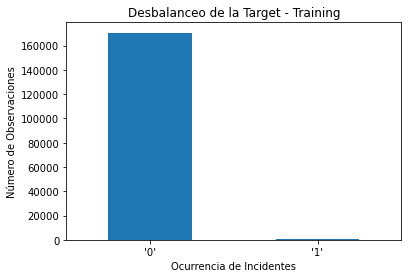

In [15]:
#Graficando el Desbalanceo de la Target en el Training Set
count_classes.plot(kind='bar',rot=0)
plt.title('Desbalanceo de la Target - Training')
plt.xlabel('Ocurrencia de Incidentes')
plt.ylabel('Número de Observaciones')
plt.show()

# UnderSampling

**_2. Crear un dataframe a partir de la data de entrenamiento con la tecnica de balanceo de datos "OverSampling"_**

In [16]:
fraude_entrenamiento.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.871921,-1.443713,-0.751781,-1.164242,-0.445334,1.308200,-1.312689,0.436614,-0.133761,0.762721,...,0.541979,1.509274,0.052333,-1.583448,-0.386837,0.036303,0.046767,-0.056700,96.00,'0'
1,2.182974,-1.008460,-2.834986,-3.264015,0.830545,0.294460,-0.090330,-0.001023,0.272701,-0.272232,...,-0.144837,0.331923,0.031033,-0.945655,0.347180,-0.583293,0.053490,-0.086282,6.97,'0'
2,1.937508,-0.641264,-0.282543,0.151947,-0.569875,0.520526,-1.052534,0.356209,1.490638,0.014241,...,0.084969,0.284532,0.226857,0.153108,-0.369480,-0.428107,0.039198,-0.034140,21.15,'0'
3,-2.425694,0.021840,1.568449,-0.400754,-1.376772,-0.465135,-0.170305,0.470701,-1.259302,0.014449,...,-0.305198,-0.488852,-0.240848,0.345232,0.207288,-0.589289,-0.479799,-0.564170,89.90,'0'
4,1.286755,-1.194764,1.503195,-0.353358,-1.869471,0.605151,-1.749865,0.461911,0.668069,0.467496,...,0.155647,0.710105,-0.129878,0.051088,0.449721,-0.038945,0.073214,0.011353,5.80,'0'


In [17]:
#Primero creamos una instancia de NearMiss
under=NearMiss(sampling_strategy=0.7, #proporcion de balanceo final
              n_neighbors=11) #numero de vecinos a considerar en la aleatoriedad

In [18]:
#fit_resample me arroja 2 objetos ya balanceados
xtrain_under,ytrain_under= under.fit_resample(xtrain,ytrain)

In [19]:
#Datos de Entrenamiento DF
xtrain_under=pd.DataFrame(xtrain_under,columns=columns)
ytrain_under=pd.DataFrame(ytrain_under,columns=["Class"])

fraude_entrenamiento_under=pd.concat([xtrain_under,ytrain_under],axis=1)
fraude_entrenamiento_under.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.181213,1.224356,-1.488377,1.679347,0.817619,-1.560638,0.670368,-0.239600,-0.394236,-1.579606,...,-0.167333,-0.373286,-0.132332,0.061062,0.723608,-0.283007,0.053479,0.095746,1.00,'0'
1,1.204859,1.239465,-1.617894,1.599566,1.004932,-1.366792,0.684636,-0.236725,-0.419992,-1.588344,...,-0.185241,-0.407103,-0.176178,-0.256380,0.777906,-0.263852,0.055176,0.093083,0.75,'0'
2,1.202009,1.190585,-1.632177,1.606599,0.948371,-1.381099,0.644213,-0.201820,-0.326250,-1.570709,...,-0.191619,-0.458540,-0.169828,-0.273293,0.756470,-0.261907,0.050888,0.091967,1.99,'0'
3,1.181516,1.254303,-1.479782,1.675330,0.854511,-1.550802,0.698414,-0.263085,-0.456828,-1.591747,...,-0.162580,-0.339431,-0.137294,0.072380,0.737595,-0.284393,0.056181,0.096634,1.00,'0'
4,1.247352,1.271853,-1.594286,1.651759,0.798938,-1.842113,0.748526,-0.363491,-0.384503,-1.538167,...,-0.215111,-0.538783,-0.203357,0.049328,0.843491,-0.292891,0.037272,0.096089,1.00,'0'


In [20]:
count_classes_under=pd.value_counts(fraude_entrenamiento_under.Class)
count_classes_under

'0'    421
'1'    295
Name: Class, dtype: int64

In [21]:
#Verificando la proporcion entre categorias
prop=round(count_classes_under[1]*100/count_classes_under[0],1)
prop

70.1

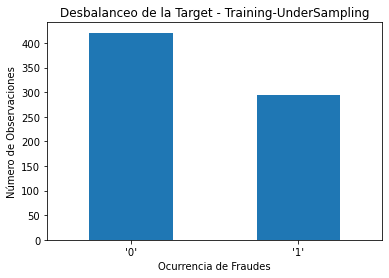

In [22]:
#Graficando el Desbalanceo de la Target en el Training Set
count_classes_under.plot(kind='bar',rot=0)
plt.title('Desbalanceo de la Target - Training-UnderSampling')
plt.xlabel('Ocurrencia de Fraudes')
plt.ylabel('Número de Observaciones')
plt.show()

# OverSampling

**_3. Crear un dataframe a partir de la data de entrenamiento con la tecnica de balanceo de datos "OverSampling"_**

In [23]:
#Creamos una instancia de RandomOverSampler
over=RandomOverSampler(sampling_strategy=0.7,
                      random_state=2020)#semilla, se puede colocar cualquier numero pero las personas que tengan el mismo numero tendran la data similar


In [24]:
xtrain_over,ytrain_over=over.fit_resample(xtrain,ytrain)


In [25]:
#Datos de Entrenamiento DF
xtrain_over=pd.DataFrame(xtrain_over,columns=columns)
ytrain_over=pd.DataFrame(ytrain_over,columns=["Class"])

fraude_entrenamiento_over=pd.concat([xtrain_over,ytrain_over],axis=1)
fraude_entrenamiento_over.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.871921,-1.443713,-0.751781,-1.164242,-0.445334,1.308200,-1.312689,0.436614,-0.133761,0.762721,...,0.541979,1.509274,0.052333,-1.583448,-0.386837,0.036303,0.046767,-0.056700,96.00,'0'
1,2.182974,-1.008460,-2.834986,-3.264015,0.830545,0.294460,-0.090330,-0.001023,0.272701,-0.272232,...,-0.144837,0.331923,0.031033,-0.945655,0.347180,-0.583293,0.053490,-0.086282,6.97,'0'
2,1.937508,-0.641264,-0.282543,0.151947,-0.569875,0.520526,-1.052534,0.356209,1.490638,0.014241,...,0.084969,0.284532,0.226857,0.153108,-0.369480,-0.428107,0.039198,-0.034140,21.15,'0'
3,-2.425694,0.021840,1.568449,-0.400754,-1.376772,-0.465135,-0.170305,0.470701,-1.259302,0.014449,...,-0.305198,-0.488852,-0.240848,0.345232,0.207288,-0.589289,-0.479799,-0.564170,89.90,'0'
4,1.286755,-1.194764,1.503195,-0.353358,-1.869471,0.605151,-1.749865,0.461911,0.668069,0.467496,...,0.155647,0.710105,-0.129878,0.051088,0.449721,-0.038945,0.073214,0.011353,5.80,'0'


In [26]:
#Calculando las frecuencias por categoria
count_classes_over=pd.value_counts(fraude_entrenamiento_over.Class)
count_classes_over

'0'    170589
'1'    119412
Name: Class, dtype: int64

In [27]:
#Verificando la proporcion 
prop=round(count_classes_over[1]*100/count_classes_over[0],1)
prop

70.0

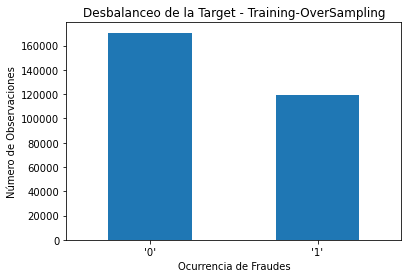

In [28]:
#Graficando el Desbalanceo de la Target en el Training Set
count_classes_over.plot(kind='bar',rot=0)
plt.title('Desbalanceo de la Target - Training-OverSampling')
plt.xlabel('Ocurrencia de Fraudes')
plt.ylabel('Número de Observaciones')
plt.show()

# SMOTE_Tomek

**_4. Crear un dataframe a partir de la data de entrenamiento con la tecnica de balanceo de datos "SmoteTomek"_**

In [35]:
st=SMOTETomek(sampling_strategy=0.7)

In [30]:
xtrain_st,ytrain_st=st.fit_sample(xtrain,ytrain)

In [31]:
#Datos de Entrenamiento DF
xtrain_st=pd.DataFrame(xtrain_st,columns=columns)
ytrain_st=pd.DataFrame(ytrain_st,columns=["Class"])

fraude_entrenamiento_st=pd.concat([xtrain_st,ytrain_st],axis=1)
fraude_entrenamiento_st.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.871921,-1.443713,-0.751781,-1.164242,-0.445334,1.308200,-1.312689,0.436614,-0.133761,0.762721,...,0.541979,1.509274,0.052333,-1.583448,-0.386837,0.036303,0.046767,-0.056700,96.00,'0'
1,2.182974,-1.008460,-2.834986,-3.264015,0.830545,0.294460,-0.090330,-0.001023,0.272701,-0.272232,...,-0.144837,0.331923,0.031033,-0.945655,0.347180,-0.583293,0.053490,-0.086282,6.97,'0'
2,1.937508,-0.641264,-0.282543,0.151947,-0.569875,0.520526,-1.052534,0.356209,1.490638,0.014241,...,0.084969,0.284532,0.226857,0.153108,-0.369480,-0.428107,0.039198,-0.034140,21.15,'0'
3,-2.425694,0.021840,1.568449,-0.400754,-1.376772,-0.465135,-0.170305,0.470701,-1.259302,0.014449,...,-0.305198,-0.488852,-0.240848,0.345232,0.207288,-0.589289,-0.479799,-0.564170,89.90,'0'
4,1.286755,-1.194764,1.503195,-0.353358,-1.869471,0.605151,-1.749865,0.461911,0.668069,0.467496,...,0.155647,0.710105,-0.129878,0.051088,0.449721,-0.038945,0.073214,0.011353,5.80,'0'


In [32]:
#Calculando las frecuencias por categoria
count_classes_st=pd.value_counts(fraude_entrenamiento_st.Class)
count_classes_st

'0'    170586
'1'    119409
Name: Class, dtype: int64

In [33]:
#Verificando la proporcion 
prop=round(count_classes_st[1]*100/count_classes_st[0],1)
prop

70.0

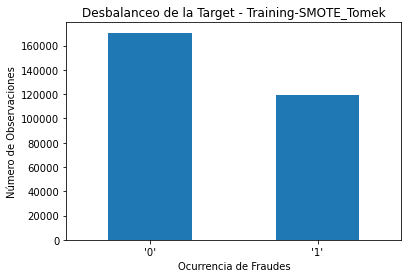

In [34]:
#Graficando el Desbalanceo de la Target en el Training Set 
count_classes_st.plot(kind='bar',rot=0)
plt.title('Desbalanceo de la Target - Training-SMOTE_Tomek')
plt.xlabel('Ocurrencia de Fraudes')
plt.ylabel('Número de Observaciones')
plt.show()